In [59]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os

In [61]:
path = r"C:\Users\GUITA\Desktop\Stuff\Projects\Plant CLEF\alexnet\seg_train\seg_train"
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [62]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0.]')

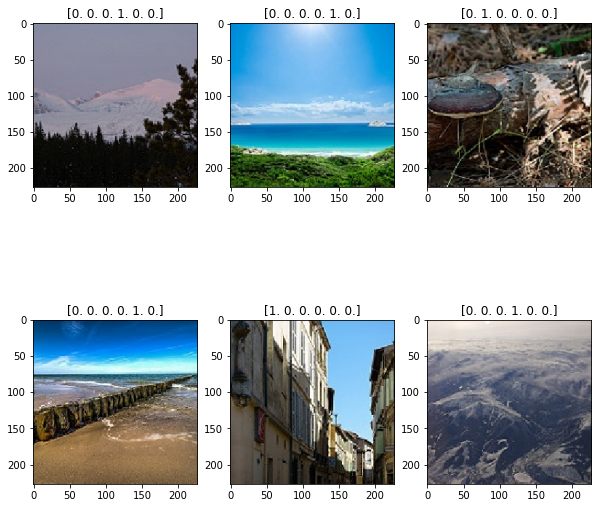

In [63]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [64]:
X_input = Input(train[0][0].shape[1:])
    
X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
X = BatchNormalization(axis = 3 , name = "bn0")(X)
X = Activation('relu')(X)
    
X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
X = BatchNormalization(axis = 3 ,name='bn1')(X)
X = Activation('relu')(X)
    
X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)
    
X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
X = BatchNormalization(axis = 3, name = 'bn3')(X)
X = Activation('relu')(X)
    
X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
X = BatchNormalization(axis = 3, name = 'bn4')(X)
X = Activation('relu')(X)
    
X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
X = Flatten()(X)
    
X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
X = Dense(6,activation='softmax',name = 'fc2')(X)
    
model = Model(inputs = X_input, outputs = X, name='AlexNet')


In [65]:
model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_5 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [68]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [69]:
model.fit_generator(train,epochs=20)

Epoch 1/20


<ipython-input-69-3aa94ac08f6e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,epochs=20)


439/439 [==============================] - 500s 1s/step - loss: 2.2128 - accuracy: 0.5294
Epoch 2/20
439/439 [==============================] - 493s 1s/step - loss: 0.8937 - accuracy: 0.6615
Epoch 3/20
439/439 [==============================] - 506s 1s/step - loss: 0.7162 - accuracy: 0.7403
Epoch 4/20
439/439 [==============================] - 510s 1s/step - loss: 0.6217 - accuracy: 0.7740
Epoch 5/20
439/439 [==============================] - 510s 1s/step - loss: 0.5556 - accuracy: 0.8036
Epoch 6/20
439/439 [==============================] - 512s 1s/step - loss: 0.5236 - accuracy: 0.8180
Epoch 7/20
439/439 [==============================] - 512s 1s/step - loss: 0.4860 - accuracy: 0.8284
Epoch 8/20
439/439 [==============================] - 508s 1s/step - loss: 0.4605 - accuracy: 0.8378
Epoch 9/20
439/439 [==============================] - 519s 1s/step - loss: 0.4361 - accuracy: 0.8457
Epoch 10/20
439/439 [==============================] - 512s 1s/step - loss: 0.4076 - accuracy: 0.8581


In [70]:
path_test = r"C:\Users\GUITA\Desktop\Stuff\Projects\Plant CLEF\alexnet\seg_test\seg_test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [71]:
preds=model.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

<ipython-input-71-c0fec294a8d5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds=model.evaluate_generator(test)


Loss = 1.5605508089065552
Test Accuracy = 0.5960000157356262


In [72]:
path_test = r"C:\Users\GUITA\Desktop\Stuff\Projects\Plant CLEF\alexnet\seg_pred\\"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 7301 images belonging to 1 classes.


In [73]:
model.save_weights('savedweights.h5')

In [74]:
predictions = model.predict_generator(predict)

<ipython-input-74-b3c6b96bfdce>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(predict)


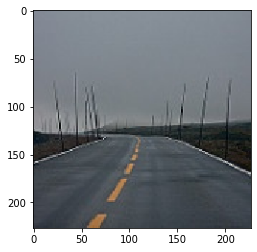

In [76]:
imshow(predict[700][0][0])

In [81]:
print(predictions[700])

[0.34447348 0.00095475 0.08373871 0.3470902  0.21229698 0.0114459 ]


In [84]:
def get_category(predicted_output):
    path =r"C:\Users\GUITA\Desktop\Stuff\Projects\Plant CLEF\alexnet\seg_train\seg_train"
    return os.listdir(path)[np.argmax(predicted_output)]

In [85]:
print(get_category(predictions[700]))

mountain
